# Data - Credit Card Fraud Detection

In [1]:
# !pip install pandas
# !pip install seaborn
# !pip install kaggle
# !pip install scikit-learn

In [2]:
# import kaggle

In [3]:
# !kaggle datasets download -d mlg-ulb/creditcardfraud

In [4]:
# import zipfile
# with zipfile.ZipFile('creditcardfraud.zip', 'r') as zip_ref:
#     zip_ref.extractall('creditcardfraud/')

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
fraud_df = pd.read_csv('creditcardfraud/creditcard.csv')
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Dataset content

1. Transactions made by credit cards in September 2013 (European cardholders)
2. Transactions ocurred in two days
    1. 492 out of 284807 were fraudulent ie. 0.172% of the data (highly unbalanced)
3. All fields are encrypted and they are result of PCA transformation
4. V1, V2,...V28 are principal components obtained through PCA
5. Time and Amount have not been transformed
6. Time -> seconds elapsed between each transaction and the first transaction in the dataset
7. Class 1 -> Fraud, 0-> Legit

In [7]:
fraud_df[fraud_df['Class']==1].head() #transactions that were classified as fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [8]:
fraud_df[fraud_df['Class']==0].head() #first five legit transactions

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
# % of transactions that were fraud
fraud_df[fraud_df['Class']==1].shape[0]/fraud_df.shape[0]*100

0.1727485630620034

In [10]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
fraud_df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<Axes: xlabel='Class', ylabel='count'>

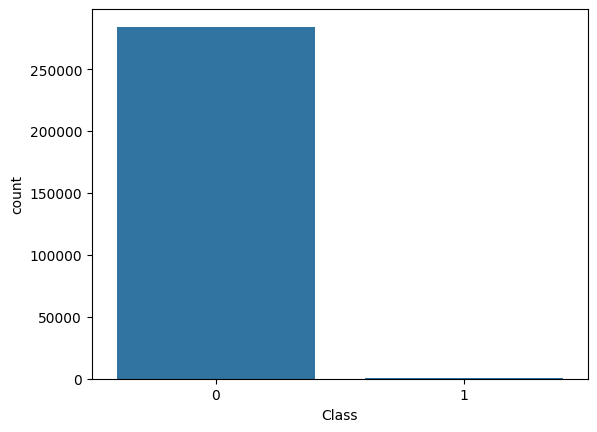

In [12]:
sns.countplot(x='Class', data=fraud_df)

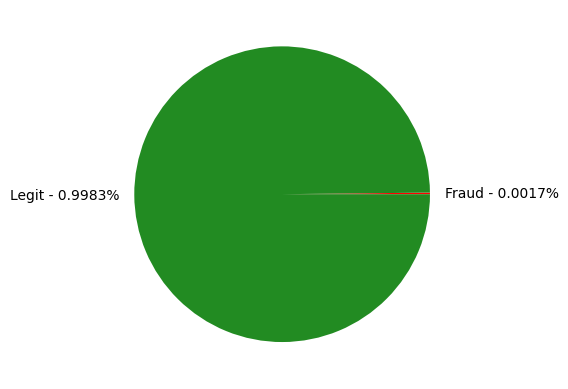

In [13]:
fraud_trns = fraud_df[fraud_df['Class']==1].shape[0]
legit_trns = fraud_df[fraud_df['Class']==0].shape[0]
plt.pie(np.array([fraud_trns,legit_trns]), 
        labels=[f'Fraud - {fraud_trns/fraud_df.shape[0]:.4f}%',
                f'Legit - {legit_trns/fraud_df.shape[0]:.4f}%'],
       colors=['red','forestgreen'])
plt.show()

From the aboove above outputs we can conclude that the context given was true, 
1. The data is very skewed
2. There are no null values in the data

## Let us examine only the fraud transactions

<Axes: xlabel='Time', ylabel='Amount'>

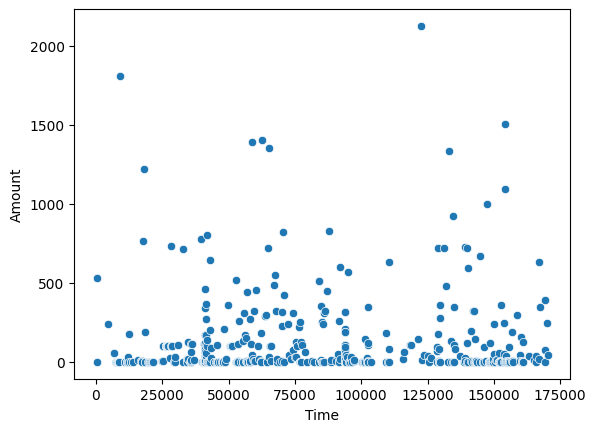

In [14]:
fraud_transactions = fraud_df[fraud_df['Class']==1]
sns.scatterplot(x='Time', y='Amount', data=fraud_transactions)

This lets us conclude that most of the fraudulent transactions are of low amount and they are mostly distributed. 

Let us check if there is a specific day targeted by fraudsters.

In [15]:
# Time is given in seconds 
fraud_df.Time.head(15)

0      0.0
1      0.0
2      1.0
3      1.0
4      2.0
5      2.0
6      4.0
7      7.0
8      7.0
9      9.0
10    10.0
11    10.0
12    10.0
13    11.0
14    12.0
Name: Time, dtype: float64

In [16]:
fraud_df.Time[:-10:-1]

284806    172792.0
284805    172788.0
284804    172788.0
284803    172787.0
284802    172786.0
284801    172785.0
284800    172784.0
284799    172783.0
284798    172782.0
Name: Time, dtype: float64

In [17]:
# Thus it is safe to assume that the value is time elapsed between the nth transaction and first transaction
fraud_df.Time.iloc[-1]/(60*60*24)

1.9999074074074075

<Axes: xlabel='Hour', ylabel='Amount'>

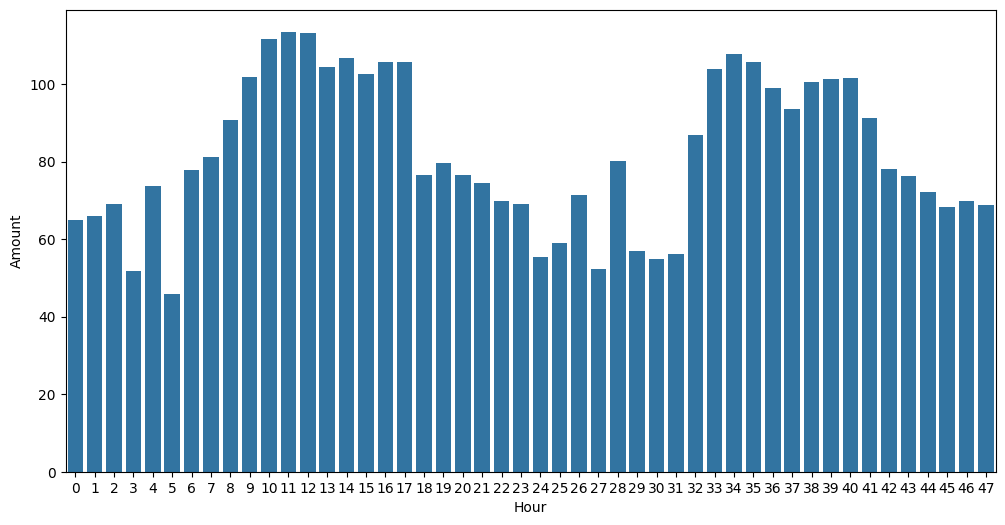

In [18]:
# we cannot assume that a transaction associates with a particular day
# 60 x 60 x 24 = 1day as the data only spans for 2 days
fraud_df_copy = fraud_df
fraud_df_copy['Hour'] = fraud_df['Time'].apply(lambda x: x//3600)
fraud_df_copy = fraud_df_copy.groupby('Hour')['Amount'].mean().reset_index()
fraud_df_copy['Hour'] = fraud_df_copy['Hour'].astype(int)
plt.figure(figsize=(12, 6)) 
sns.barplot(data=fraud_df_copy, x='Hour', y='Amount')

Eventhough the graph seems periodic, there isnt enough data to support that this continues
Also there isn't much difference in the mean amount withdrawn on an hourly basis 
Thus, we can't state that there is a specific time of the day target by fraudsters

In [19]:
print(f"Mean of Fraud Transactions - {fraud_transactions.Amount.mean()}$")
print(f"Mean of Legit Transactions - {fraud_df[fraud_df['Class']==0].Amount.mean()}$")

Mean of Fraud Transactions - 122.21132113821139$
Mean of Legit Transactions - 88.29102242231328$


In [20]:
fraud_df.drop(columns=['Hour'], inplace=True)
sample_df = fraud_df.sample(frac=0.1, random_state=22)

In [21]:
sample_df.shape

(28481, 31)

In [22]:
sample_fraud = sample_df[sample_df['Class']==1]
sample_legit = sample_df[sample_df['Class']==0]
print(f"Number of Fraud Transactions - {sample_fraud.shape[0]}")
print(f"Number of Legit Transactions - {sample_legit.shape[0]}")

Number of Fraud Transactions - 41
Number of Legit Transactions - 28440


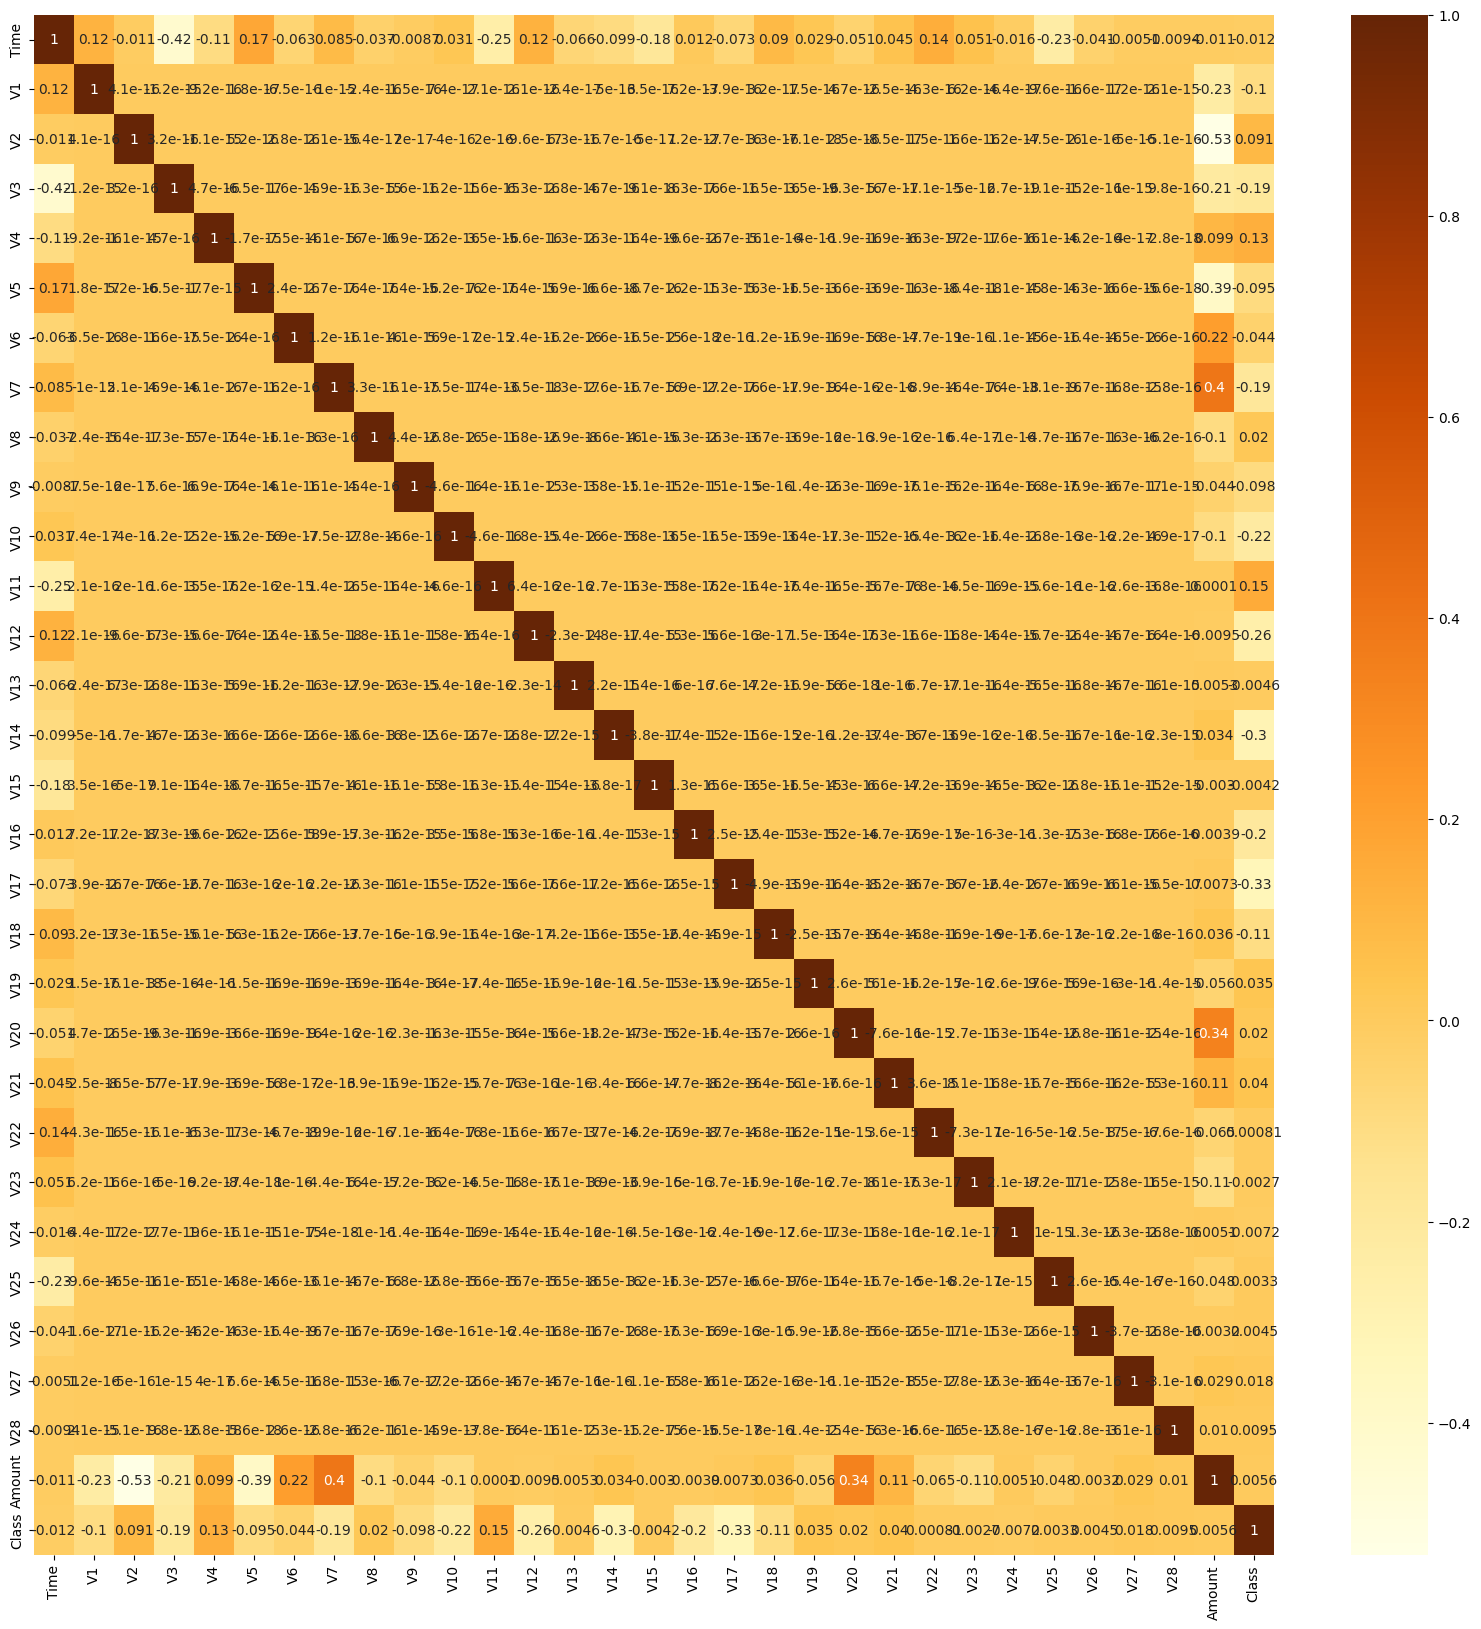

In [23]:
corrmat = sample_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(fraud_df[top_corr_features].corr(), annot=True,cmap='YlOrBr')

## Cleaning Data 

### Scaling Amount and Time

In [24]:
from sklearn.preprocessing import StandardScaler
time_scaler = StandardScaler()
scaled_time = time_scaler.fit_transform(fraud_df[['Time']])

amount_scaler = StandardScaler()
scaled_amount = amount_scaler.fit_transform(fraud_df[['Time']])

In [25]:
fraud_df['Scaled Time'] = scaled_time
fraud_df['Scaled Amount'] = scaled_amount
fraud_df.drop(['Amount', 'Time'], axis=1, inplace=True)
fraud_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Scaled Time,Scaled Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-1.996583,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-1.996583,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-1.996562,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-1.996562,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-1.996541,-1.996541


### Removing extreme outliers

In [26]:
corrmat = corrmat[["Class"]]
print(corrmat[corrmat.Class>0.5])
print()
print(corrmat[corrmat.Class<-0.5])

       Class
Class    1.0

Empty DataFrame
Columns: [Class]
Index: []


In [27]:
#Eventhough the sample does not show any strong correlation let's try again with the whole data
corrmat = fraud_df.corr()
corrmat = corrmat[["Class"]]
print(corrmat[corrmat.Class>0.5])
print()
print(corrmat[corrmat.Class<-0.5])

       Class
Class    1.0

Empty DataFrame
Columns: [Class]
Index: []


This means that we do not have to worry about outliers in the features made with PCA

## Modeling

First, let's train the models with the the imbalanced data itself 

In [28]:
cols = sample_df.columns.to_list()
features = [col for col in cols if col not in ['Class']] 
target = "Class"

X = sample_df[features]
Y = sample_df[target]
X.shape, Y.shape

((28481, 30), (28481,))

In [29]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [30]:
state = np.random.RandomState(22)
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
outlier_fraction = len(sample_fraud)/len(sample_legit)

classifiers = {
    "Isolation Forest": IsolationForest(n_estimators = 100,
                                        max_samples = len(X),
                                        contamination = outlier_fraction,
                                        random_state = state,
                                        verbose=0),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20,
                                               algorithm='auto',
                                               leaf_size=30,
                                               metric='minkowski',
                                               p=2,
                                               metric_params=None,
                                               novelty=False,
                                               contamination=outlier_fraction),
    "SVM": OneClassSVM(kernel="rbf",
                       degree=3,
                       gamma=0.1,
                       nu=0.05,
                       max_iter=-1)
}

In [31]:
from sklearn.metrics import classification_report,accuracy_score

In [32]:
for _, (clf_name, clf) in enumerate(classifiers.items()):
    if clf_name == "Isolation Forest":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.decision_function(X)
    elif clf_name == "Local Outlier Factor":
        clf.fit(X)
        y_pred = clf.fit_predict(X)
    else:
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    # Correcting output prediction values to 0->legit & 1->Fraud
    y_pred[y_pred ==  1] = 0
    y_pred[y_pred ==  -1] = 1
    n_errors = (y_pred != Y).sum()
    # Metrics
    print(f"{clf_name}: {n_errors} wrong outcome")
    print(f"Accuracy Score: {accuracy_score(Y, y_pred)}")
    print(f"Classification Report: \n{classification_report(Y, y_pred)}")

Isolation Forest: 59 wrong outcome
Accuracy Score: 0.9979284435237527
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28440
           1       0.29      0.29      0.29        41

    accuracy                           1.00     28481
   macro avg       0.64      0.65      0.64     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor: 81 wrong outcome
Accuracy Score: 0.9971559987359995
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28440
           1       0.02      0.02      0.02        41

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481

SVM: 9287 wrong outcome
Accuracy Score: 0.673922966187985
Classification Report: 
              precision    recall  f1-score   support

           0     

Let us calculate accuracies with a test set of a similar size 

In [33]:
test_fraud_df = fraud_df[~fraud_df.index.isin(sample_df.index)]
test_fraud_df = test_fraud_df.sample(frac=0.1, random_state=22)
X_test = test_fraud_df[features]
Y_test = test_fraud_df[target]
X_test.shape, Y_test.shape

KeyError: "['Time', 'Amount'] not in index"

In [ ]:
for _, (clf_name, clf) in enumerate(classifiers.items()):
    if clf_name == "Isolation Forest":
        y_test = clf.predict(X_test)
    elif clf_name == "Local Outlier Factor":
        # cant use predict as novelty is set to False
        continue
    else:
        y_test = clf.predict(X_test)
    # Correcting output prediction values to 0->legit & 1->Fraud
    y_pred[y_pred ==  1] = 0
    y_pred[y_pred ==  -1] = 1
    n_errors = (y_pred != Y).sum()
    # Metrics
    print(f"{clf_name}: {n_errors} wrong outcome")
    print(f"Accuracy Score: {accuracy_score(Y, y_pred)}")
    print(f"Classification Report: \n{classification_report(Y, y_pred)}")

### Let us conduct undersampling and serve the balanced data to the above models 

In [ ]:
no_of_fraud_trns = fraud_df[fraud_df['Class']==1].shape[0]
no_of_fraud_trns

In [ ]:
fraud_sample = fraud_df[fraud_df['Class']==1]
legit = fraud_df[fraud_df['Class']==0]
legit_sample = legit.sample(no_of_fraud_trns)
fraud_sample.shape, legit_sample.shape

In [ ]:
#concatenating both into a subsample data set with equal class distribution
legit_sample.reset_index(drop=True, inplace=True)
fraud_sample.reset_index(drop=True, inplace=True)
under_sample = pd.concat([legit_sample, fraud_sample])
under_sample.shape

In [ ]:
sns.countplot(x='Class', data=under_sample)

In [ ]:
from sklearn.model_selection import train_test_split

X = under_sample[features]
Y = under_sample[target]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
for _, (clf_name, clf) in enumerate(classifiers.items()):
    if clf_name == "Isolation Forest":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.decision_function(X)
    elif clf_name == "Local Outlier Factor":
        clf.fit(X)
        y_pred = clf.fit_predict(X)
    else:
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    # Correcting output prediction values to 0->legit & 1->Fraud
    y_pred[y_pred ==  1] = 0
    y_pred[y_pred ==  -1] = 1
    n_errors = (y_pred != Y).sum()
    # Metrics
    print(f"{clf_name}: {n_errors} wrong outcome")
    print(f"Accuracy Score: {accuracy_score(Y, y_pred)}")
    print(f"Classification Report: \n{classification_report(Y, y_pred)}")